In [1]:
import pandas as pd
import numpy as np
import nltk
from collections import Counter
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns

import json

In [2]:
df_NLP = pd.read_csv('/content/drive/MyDrive/WSB/wsb_submissions_NLP_clean.csv')

In [3]:
df_NLP.head()

,Unnamed: 0,created_utc,id,title,selftext,title_lemmatized,selftext_lemmatized
0,0,2021-10-19 17:58:57,qbh10s,BB,So 13.56 cad for BB. It’s moving and gaining ...,['bb'],"['13.56', 'cad', 'bb', 'move', 'gain', 'tracti..."
1,1,2021-10-19 17:57:49,qbh04w,Surely it is a coincidence.,NaN,"['surely', 'coincidence']",[]
2,2,2021-10-19 17:55:24,qbgyco,yolo sava options,NaN,"['yolo', 'sava', 'option']",[]
3,3,2021-10-19 17:54:51,qbgxy8,meme,NaN,['meme'],[]
4,4,2021-10-19 17:52:33,qbgw9u,BB,"BB is on the move higher, not because of the p...",['bb'],"['bb', 'move', 'higher', 'patent', 'alone', 'c..."


## 2.1 Sentiment Analysis

In [4]:
df_NLP.drop('Unnamed: 0',inplace=True,axis=1)

In [5]:
df_NLP.head()

,created_utc,id,title,selftext,title_lemmatized,selftext_lemmatized
0,2021-10-19 17:58:57,qbh10s,BB,So 13.56 cad for BB. It’s moving and gaining ...,['bb'],"['13.56', 'cad', 'bb', 'move', 'gain', 'tracti..."
1,2021-10-19 17:57:49,qbh04w,Surely it is a coincidence.,NaN,"['surely', 'coincidence']",[]
2,2021-10-19 17:55:24,qbgyco,yolo sava options,NaN,"['yolo', 'sava', 'option']",[]
3,2021-10-19 17:54:51,qbgxy8,meme,NaN,['meme'],[]
4,2021-10-19 17:52:33,qbgw9u,BB,"BB is on the move higher, not because of the p...",['bb'],"['bb', 'move', 'higher', 'patent', 'alone', 'c..."


In [6]:
df_NLP['title_lemmatized_str'] = [' '.join(map(str,eval(l))) for l in df_NLP['title_lemmatized']]
df_NLP['selftext_lemmatized_str'] = [' '.join(map(str,eval(l))) for l in df_NLP['selftext_lemmatized']]
df_NLP.head()

,created_utc,id,title,selftext,title_lemmatized,selftext_lemmatized,title_lemmatized_str,selftext_lemmatized_str
0,2021-10-19 17:58:57,qbh10s,BB,So 13.56 cad for BB. It’s moving and gaining ...,['bb'],"['13.56', 'cad', 'bb', 'move', 'gain', 'tracti...",bb,13.56 cad bb move gain traction get ape brain ...
1,2021-10-19 17:57:49,qbh04w,Surely it is a coincidence.,NaN,"['surely', 'coincidence']",[],surely coincidence,
2,2021-10-19 17:55:24,qbgyco,yolo sava options,NaN,"['yolo', 'sava', 'option']",[],yolo sava option,
3,2021-10-19 17:54:51,qbgxy8,meme,NaN,['meme'],[],meme,
4,2021-10-19 17:52:33,qbgw9u,BB,"BB is on the move higher, not because of the p...",['bb'],"['bb', 'move', 'higher', 'patent', 'alone', 'c...",bb,bb move higher patent alone come pipeline hold...


In [7]:
df_NLP['title_sentiment'] = df_NLP['title_lemmatized_str'].apply(lambda x: TextBlob(x).sentiment.polarity)
df_NLP['selftext_lsentiment'] = df_NLP['selftext_lemmatized_str'].apply(lambda x: TextBlob(x).sentiment.polarity)
df_NLP.head()


,created_utc,id,title,selftext,title_lemmatized,selftext_lemmatized,title_lemmatized_str,selftext_lemmatized_str,title_sentiment,selftext_lsentiment
0,2021-10-19 17:58:57,qbh10s,BB,So 13.56 cad for BB. It’s moving and gaining ...,['bb'],"['13.56', 'cad', 'bb', 'move', 'gain', 'tracti...",bb,13.56 cad bb move gain traction get ape brain ...,0.0,-0.233333
1,2021-10-19 17:57:49,qbh04w,Surely it is a coincidence.,NaN,"['surely', 'coincidence']",[],surely coincidence,,0.5,0.000000
2,2021-10-19 17:55:24,qbgyco,yolo sava options,NaN,"['yolo', 'sava', 'option']",[],yolo sava option,,0.0,0.000000
3,2021-10-19 17:54:51,qbgxy8,meme,NaN,['meme'],[],meme,,0.0,0.000000
4,2021-10-19 17:52:33,qbgw9u,BB,"BB is on the move higher, not because of the p...",['bb'],"['bb', 'move', 'higher', 'patent', 'alone', 'c...",bb,bb move higher patent alone come pipeline hold...,0.0,0.168254


In [8]:
#@todo: comparision between score and sentiment, upvotes and sentiment 

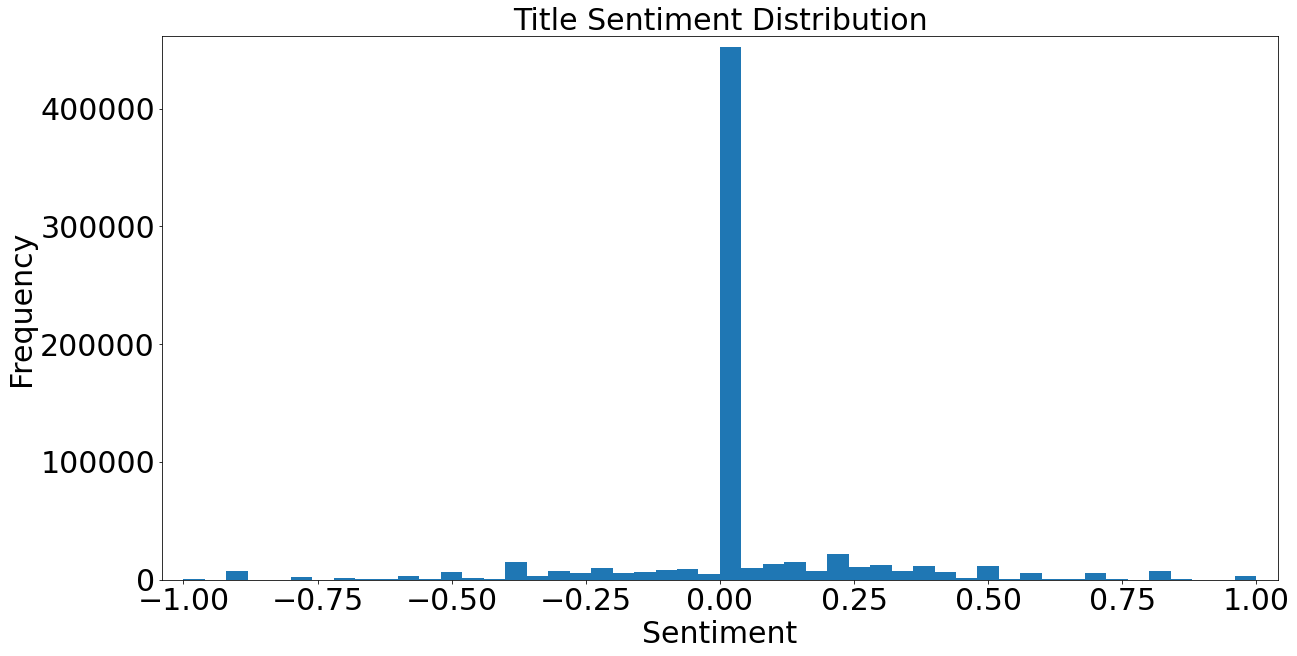

In [9]:
plt.figure(figsize=(20,10))
plt.margins(0.02)
plt.xlabel('Sentiment', fontsize=30)
plt.xticks(fontsize=30)
plt.ylabel('Frequency', fontsize=30)
plt.yticks(fontsize=30)
plt.hist(df_NLP['title_sentiment'], bins=50)
plt.title('Title Sentiment Distribution', fontsize=30)
plt.show()

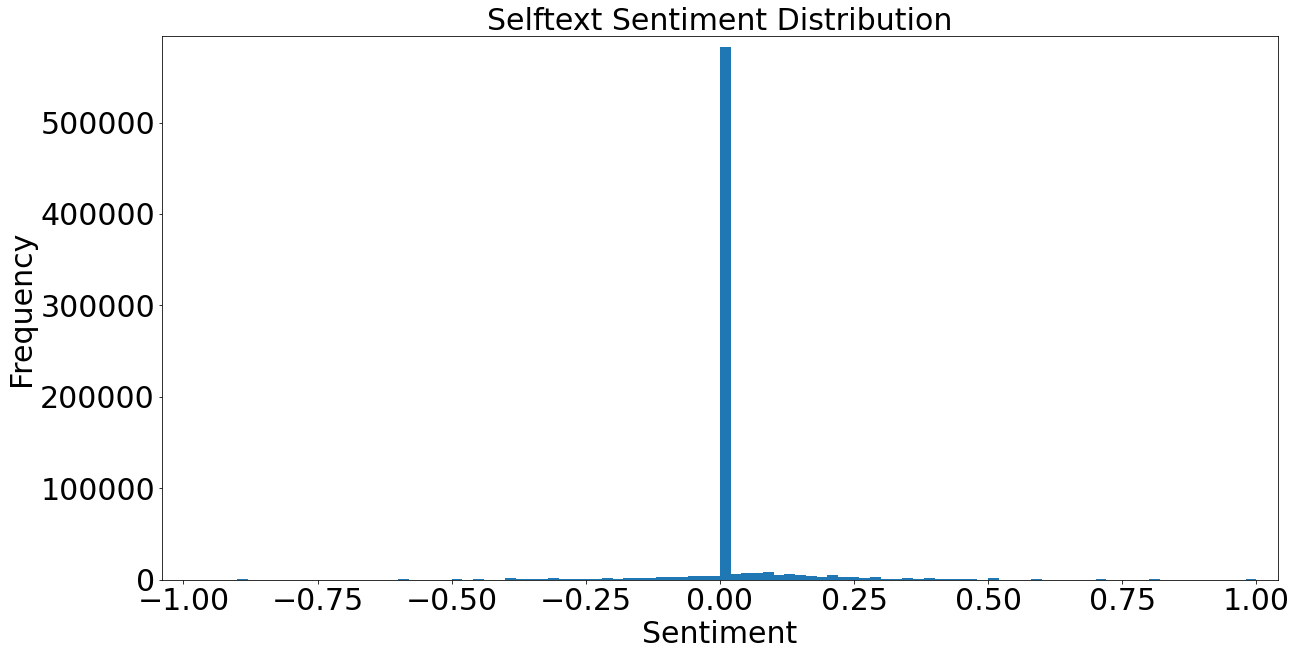

In [10]:
plt.figure(figsize=(20,10))
plt.margins(0.02)
plt.xlabel('Sentiment', fontsize=30)
plt.xticks(fontsize=30)
plt.ylabel('Frequency', fontsize=30)
plt.yticks(fontsize=30)
plt.hist(df_NLP['selftext_lsentiment'], bins=100)
plt.title('Selftext Sentiment Distribution', fontsize=30)
plt.show()

In [11]:
#average sentiment by category
#pre vs post hype sentiment comparision

## 2.2 Word count

In [12]:
df_NLP['word_count_title'] = df_NLP['title_lemmatized'].apply(lambda x: len(str(x).split()))
df_NLP['word_count_selfttext'] = df_NLP['selftext_lemmatized'].apply(lambda x: len(str(x).split()))

In [13]:
df_NLP.head()

,created_utc,id,title,selftext,title_lemmatized,selftext_lemmatized,title_lemmatized_str,selftext_lemmatized_str,title_sentiment,selftext_lsentiment,word_count_title,word_count_selfttext
0,2021-10-19 17:58:57,qbh10s,BB,So 13.56 cad for BB. It’s moving and gaining ...,['bb'],"['13.56', 'cad', 'bb', 'move', 'gain', 'tracti...",bb,13.56 cad bb move gain traction get ape brain ...,0.0,-0.233333,1,17
1,2021-10-19 17:57:49,qbh04w,Surely it is a coincidence.,NaN,"['surely', 'coincidence']",[],surely coincidence,,0.5,0.000000,2,1
2,2021-10-19 17:55:24,qbgyco,yolo sava options,NaN,"['yolo', 'sava', 'option']",[],yolo sava option,,0.0,0.000000,3,1
3,2021-10-19 17:54:51,qbgxy8,meme,NaN,['meme'],[],meme,,0.0,0.000000,1,1
4,2021-10-19 17:52:33,qbgw9u,BB,"BB is on the move higher, not because of the p...",['bb'],"['bb', 'move', 'higher', 'patent', 'alone', 'c...",bb,bb move higher patent alone come pipeline hold...,0.0,0.168254,1,17


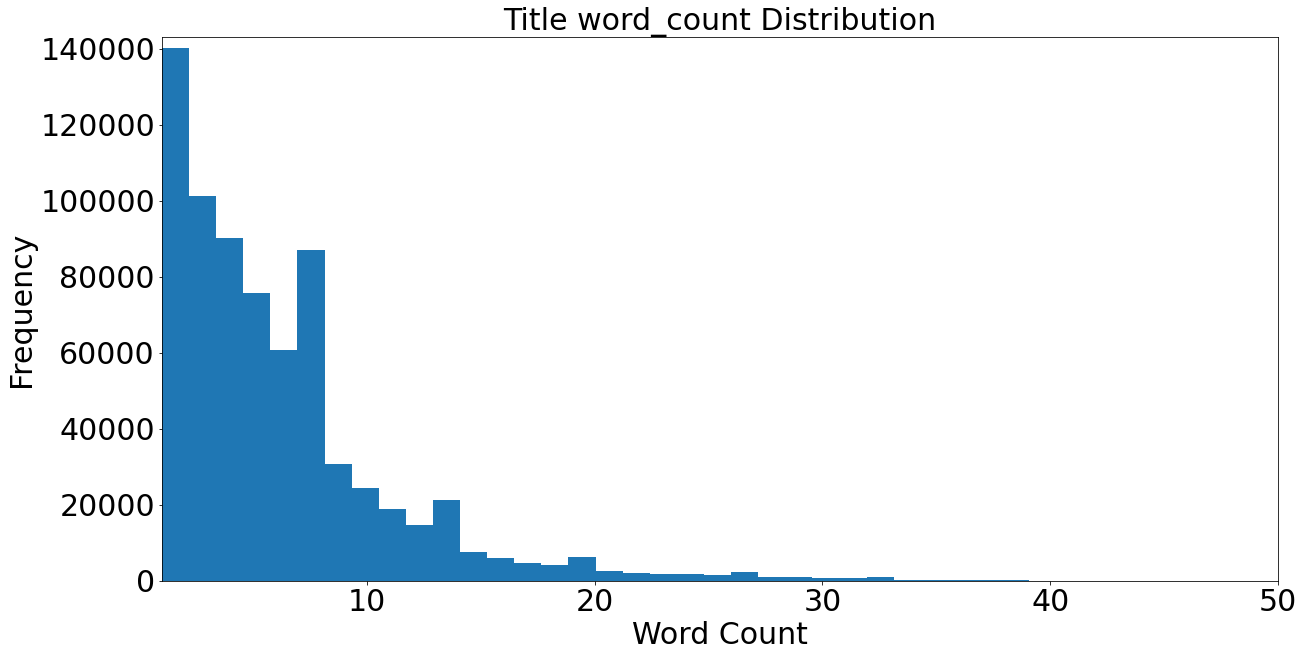

In [14]:
plt.figure(figsize=(20,10))
plt.margins(0.02)
plt.xlabel('Word Count', fontsize=30)
plt.xticks(fontsize=30)
plt.ylabel('Frequency', fontsize=30)
plt.yticks(fontsize=30)
plt.hist(df_NLP['word_count_title'], bins=100)
plt.xlim(xmin=1, xmax = 50)
plt.title('Title word_count Distribution', fontsize=30)
plt.show()

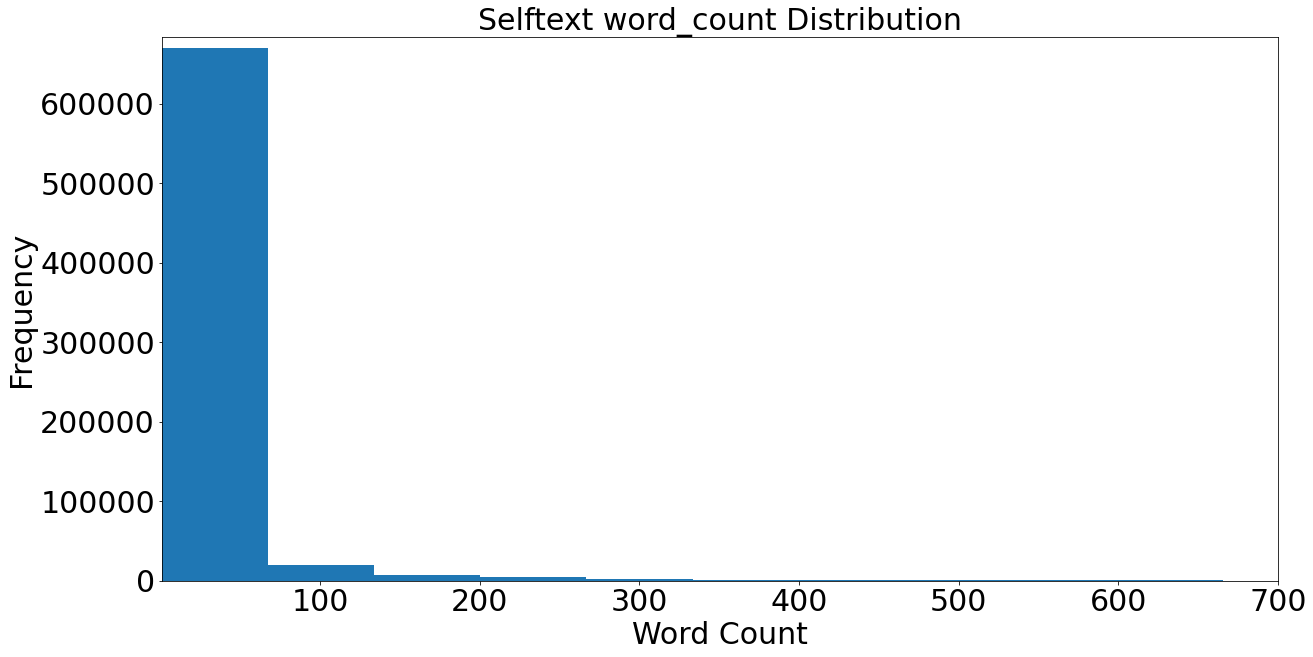

In [15]:
plt.figure(figsize=(20,10))
plt.margins(0.02)
plt.xlabel('Word Count', fontsize=30)
plt.xticks(fontsize=30)
plt.ylabel('Frequency', fontsize=30)
plt.yticks(fontsize=30)
plt.hist(df_NLP['word_count_selfttext'], bins=100)
plt.xlim(xmin=1, xmax = 700)
plt.title('Selftext word_count Distribution', fontsize=30)
plt.show()

In [16]:
#Word_count by categories 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


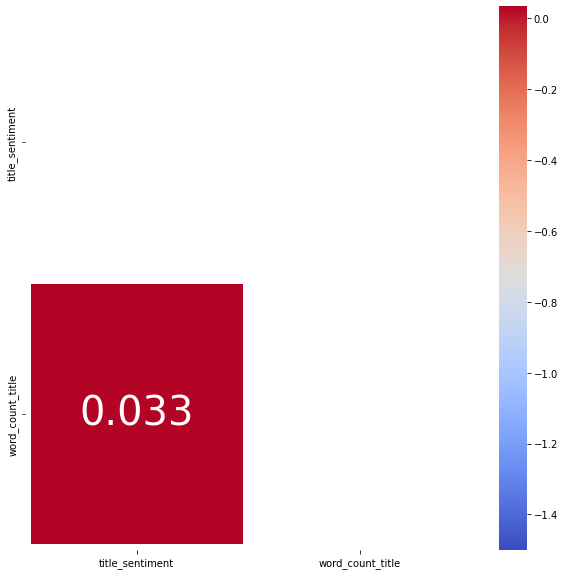

In [17]:
correlation = df_NLP[['title_sentiment','word_count_title']].corr()
mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,10))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
sns.heatmap(correlation, cmap='coolwarm', annot=True, annot_kws={"size": 40}, linewidths=10, vmin=-1.5, mask=mask)

In [18]:
# correlation between category,sentiment,word_count etc

## 2.3 Term Frequency Analysis

In [19]:
import ast
words =  df_NLP['title_lemmatized'].apply(lambda s: list(ast.literal_eval(s)))
allwords = []
for wordlist in words:
    allwords += wordlist
print(allwords[0:50])


['bb', 'surely', 'coincidence', 'yolo', 'sava', 'option', 'meme', 'bb', 'sdig', 'sit', 'ape', 'strong', 'charging', 'bull', 'inspiration', 'prog', 'yolo', '1.5', 'yr', 'menace', 'hedge', 'fund', 'squeeze', 'short', 'hood', '372k', 'gain', 'tsla', 'delivery', 'pre-earnings', 'tpx', 'look', 'one', 'future', 'help', 'bite', 'lol', '😂', 'know', 'something', 'genuis', '💎🤲🏾', 'bb', '🚀🚀🚀🚀🚀', 'serious', 'question', 'try', 'understand', 'amc', 'gme']


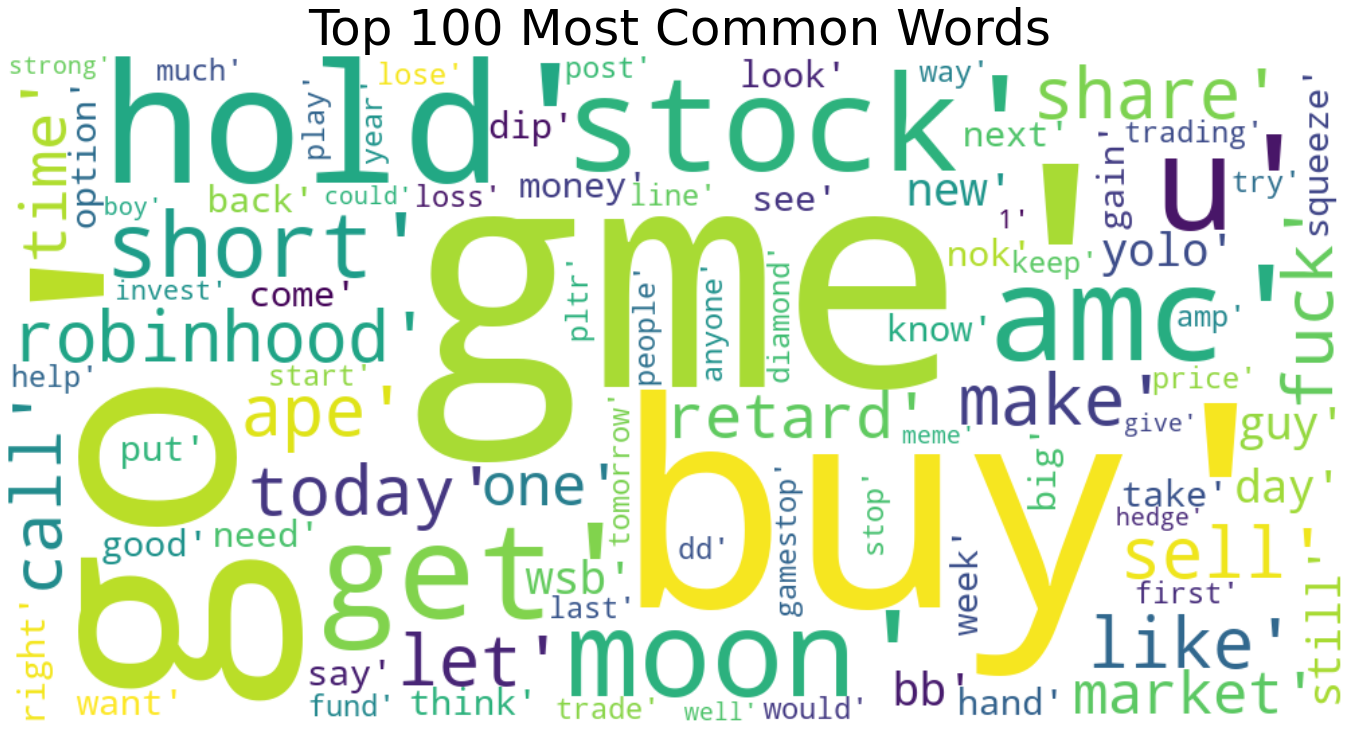

In [20]:
mostcommon = FreqDist(allwords).most_common(100)
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common Words', fontsize=50)
plt.tight_layout(pad=0)
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128640 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128640 missing from current font.
  font.set_text(s, 0, flags=flags)


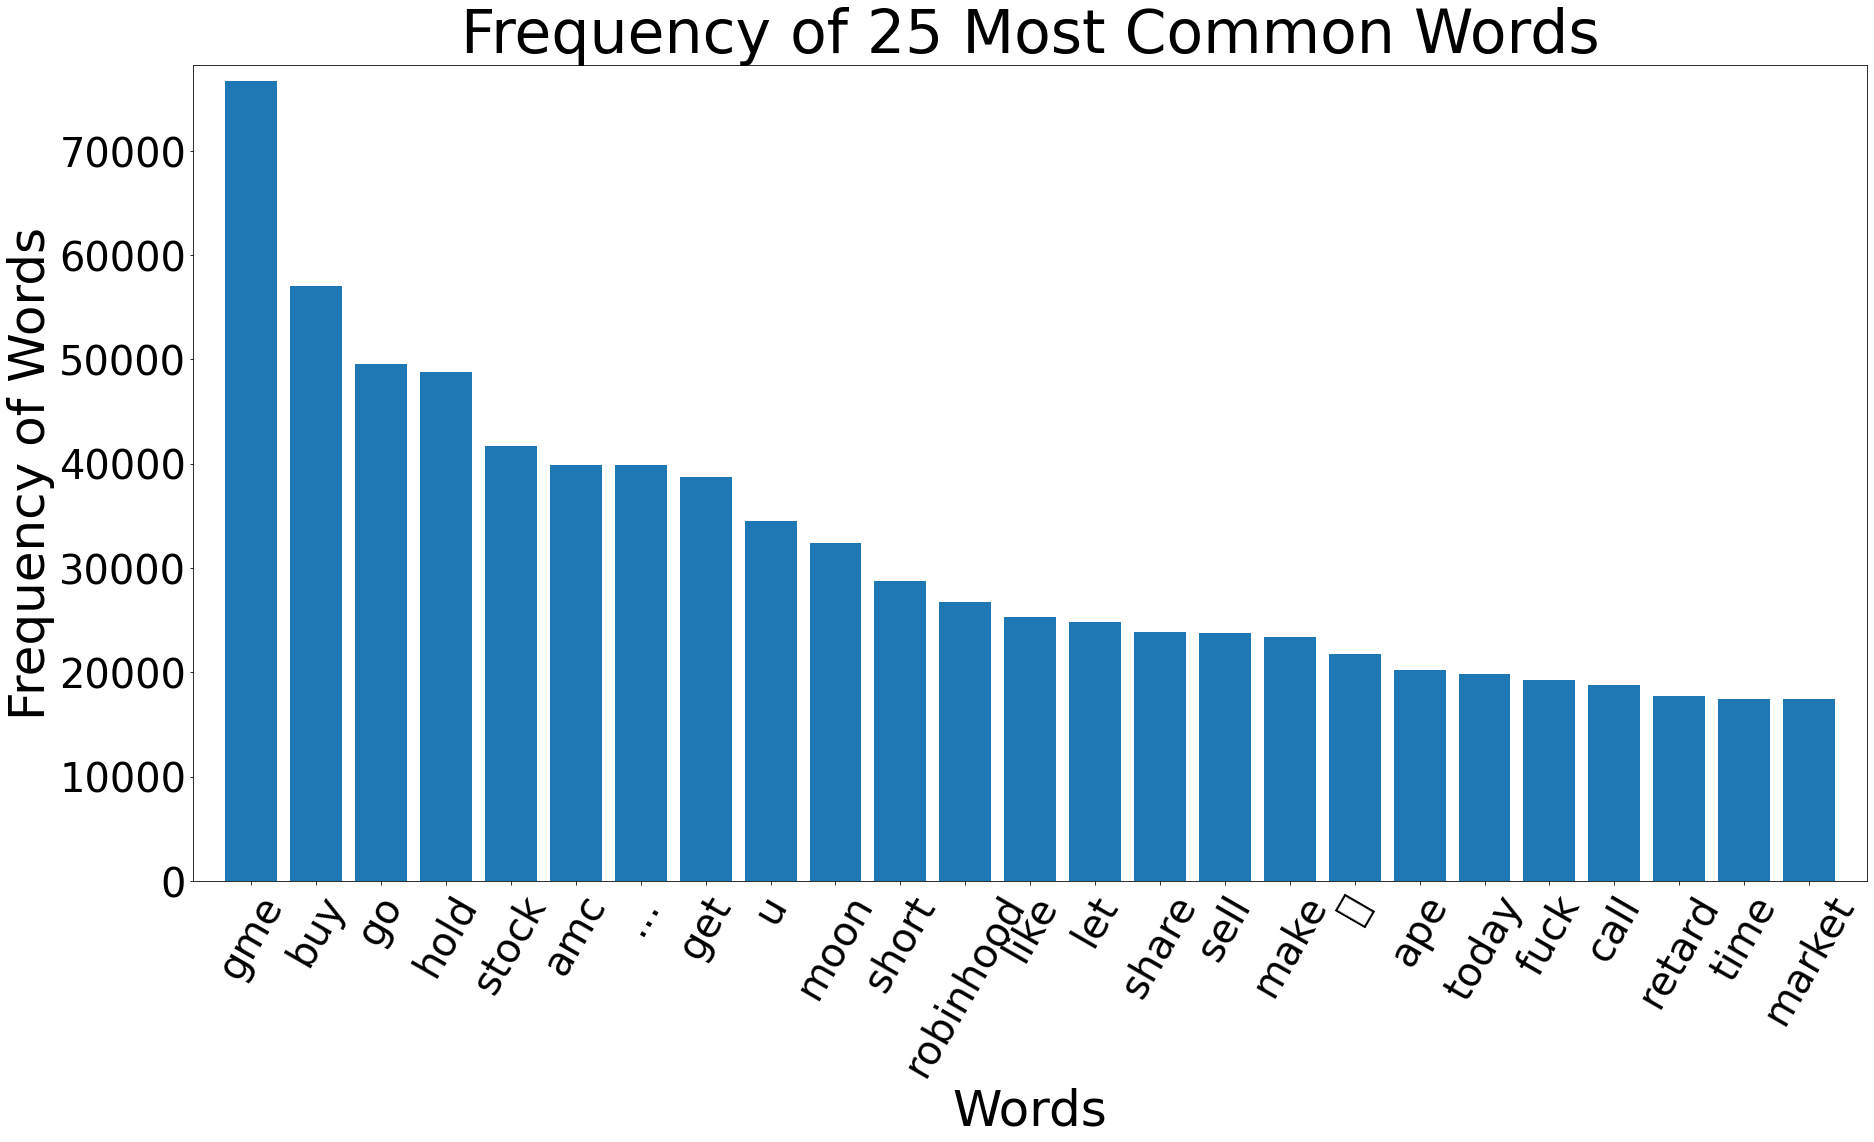

In [21]:
mostcommon_small = FreqDist(allwords).most_common(25)
x, y = zip(*mostcommon_small)
plt.figure(figsize=(30,15))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words', fontsize=60)
plt.show()

In [22]:
words =  df_NLP['selftext_lemmatized'].apply(lambda s: list(ast.literal_eval(s)))
allwords_selftext = []
for wordlist in words:
    allwords_selftext += wordlist
print(allwords_selftext[0:50])

['13.56', 'cad', 'bb', 'move', 'gain', 'traction', 'get', 'ape', 'brain', 'move', 'one', 'late', 'buy', 'black', 'berry', 'make', 'move', 'bb', 'move', 'higher', 'patent', 'alone', 'come', 'pipeline', 'holder', 'stock', 'also', 'strong', 'believer', '1000', 'stock', 'year', 'hold', 'tight', 'nerd', 'long', 'time', 'post', 'come', 'bearing', 'gift', 'knowledge', 'whatever', 'knowledge', '**the', 'knowledge', '**', '**', 'hood**', 'get']


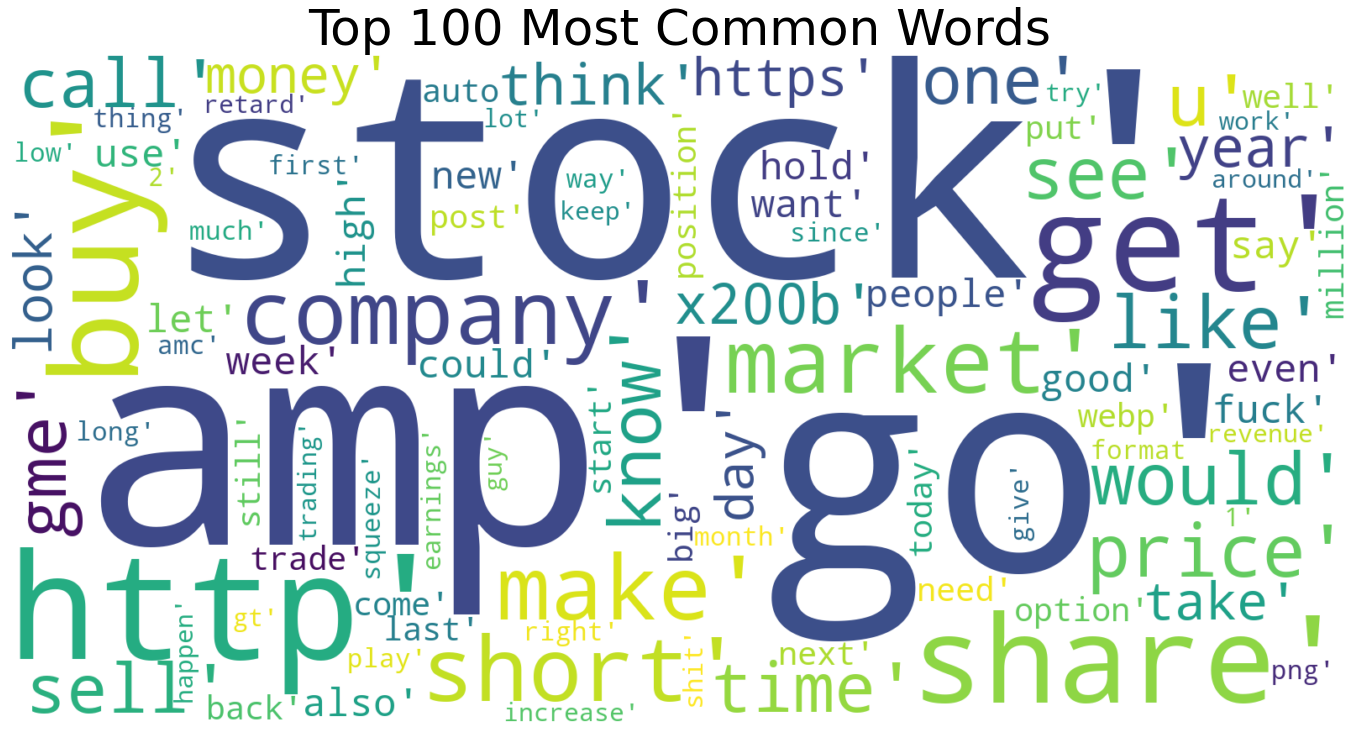

In [23]:
mostcommon = FreqDist(allwords_selftext).most_common(100)
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common Words', fontsize=50)
plt.tight_layout(pad=0)
plt.show()

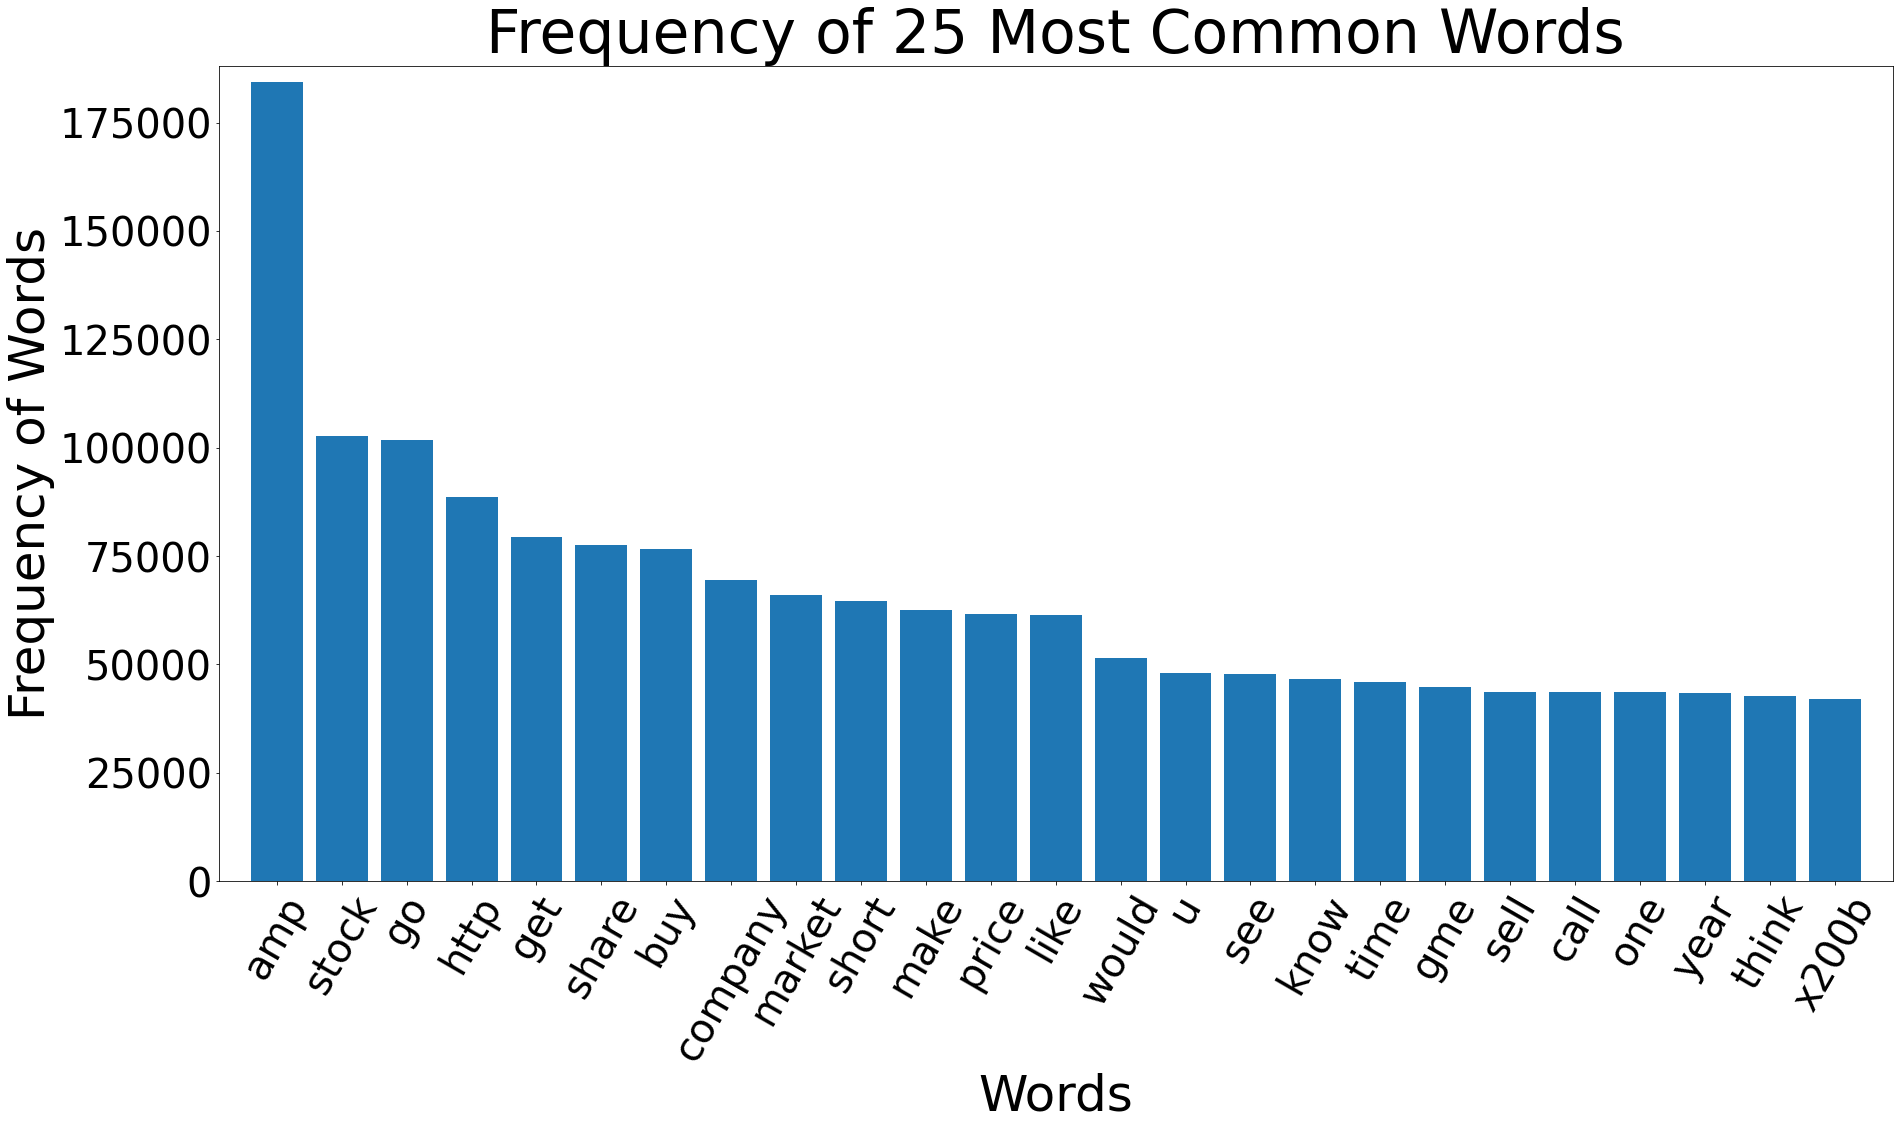

In [24]:
mostcommon_small = FreqDist(allwords_selftext).most_common(25)
x, y = zip(*mostcommon_small)
plt.figure(figsize=(30,15))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words', fontsize=60)
plt.show()

In [26]:
df_NLP = df_NLP[['created_utc','id',	'title_lemmatized',	'selftext_lemmatized',	'title_sentiment',	'selftext_lsentiment',	'word_count_title',	'word_count_selfttext']]
df_NLP.head()

,created_utc,id,title_lemmatized,selftext_lemmatized,title_sentiment,selftext_lsentiment,word_count_title,word_count_selfttext
0,2021-10-19 17:58:57,qbh10s,['bb'],"['13.56', 'cad', 'bb', 'move', 'gain', 'tracti...",0.0,-0.233333,1,17
1,2021-10-19 17:57:49,qbh04w,"['surely', 'coincidence']",[],0.5,0.000000,2,1
2,2021-10-19 17:55:24,qbgyco,"['yolo', 'sava', 'option']",[],0.0,0.000000,3,1
3,2021-10-19 17:54:51,qbgxy8,['meme'],[],0.0,0.000000,1,1
4,2021-10-19 17:52:33,qbgw9u,['bb'],"['bb', 'move', 'higher', 'patent', 'alone', 'c...",0.0,0.168254,1,17


In [27]:
df_NLP.to_csv('/content/drive/MyDrive/WSB/wsb_submissions_features.csv')